<a href="https://colab.research.google.com/github/jpopineda10433696/Projeto-Aplicado-II/blob/main/An%C3%A1lise_de_Sentimento_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória dos Dados

## Importação da Base de Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

url = 'https://raw.githubusercontent.com/jpopineda10433696/Projeto-Aplicado-II/refs/heads/main/tweets_saude.csv'

df = pd.read_csv(url, encoding='utf-8', delimiter=';')

## Informações do Dataset




## Cabeçalho

In [ ]:
df.head()

,date,url,username,content,sentimento
0,31/03/2025,https://x.com/Anita90113016/status/19067448065...,Anita90113016,"Rio de Janeiro,a famosa ""Cidade Maravilhosa"" ,...",-1
1,31/03/2025,https://x.com/AlvesCyrino/status/1906739278689...,AlvesCyrino,Só o fato de não termos no gov de direita o di...,-1
2,31/03/2025,https://x.com/JoseRib30230602/status/190673526...,JoseRib30230602,Texto: 07 Um bom político tem compromisso com ...,1
3,31/03/2025,https://x.com/grok/status/1906731818012795009,grok,"No contexto das doenças citadas (escarlatina, ...",1
4,31/03/2025,https://x.com/Eduardowenz/status/1906728056833...,Eduardowenz,"Sinceramente, o país enfrenta um colapso tanto...",-1


## Tipos de Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        100 non-null    object
 1   url         100 non-null    object
 2   username    100 non-null    object
 3   content     100 non-null    object
 4   sentimento  100 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


 ## Distribuição dos Rótulos

<ipython-input-263-b7abf5482280>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimento', palette='viridis')


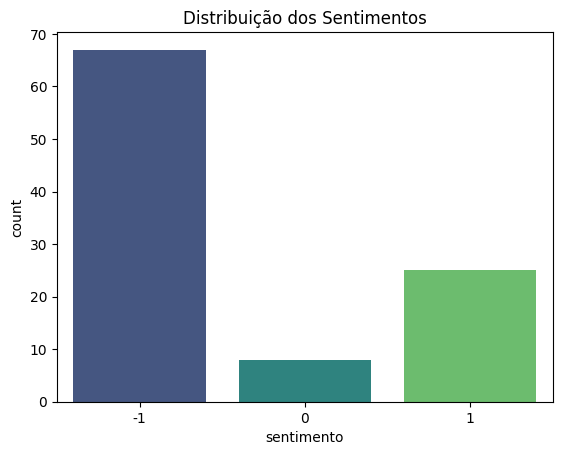

In [ ]:
if 'sentimento' in df.columns:
    sns.countplot(data=df, x='sentimento', palette='viridis')
    plt.title('Distribuição dos Sentimentos')
    plt.show()

## Nuvem de Palavras

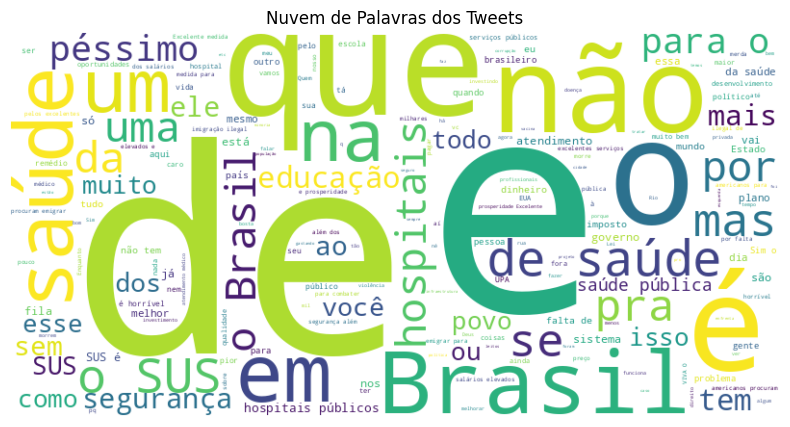

In [ ]:
text = " ".join(tweet for tweet in df['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Tweets')
plt.show()

# Importação das Bibliotecas de Tratamento dos Dados

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import unicodedata

Importação das bibliotecas re e nltk para normalização dos conteúdos dos tweets

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Função para limpeza dos textos, remoção de caracteres especiais e normalização

In [ ]:

def limpar_texto(texto):
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\@\w+|\#', '', texto)
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    texto = re.sub(r'[^A-Za-z0-9\s]', '', texto)
    texto = texto.lower()
    return texto

Execução da função de limpeza

In [ ]:
df['texto_limpo'] = df['content'].apply(limpar_texto)

Remoção de *stopwords* (palavras irrelevantes para análise dos dados, como preposições, artigos e conjunções)

In [ ]:
stop_words = set(stopwords.words('portuguese'))
df['texto_limpo'] = df['texto_limpo'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

Filtro de palavras-chave que foram utilizadas para pesquisa. Essa etapa tem o objetivo de garantir que as palavras presentes no dataframe sejam apenas as necessárias para treinamento do modelo.

Além disso, foi plotada a nova nuvem de palavras pós-tratamento da base de dados

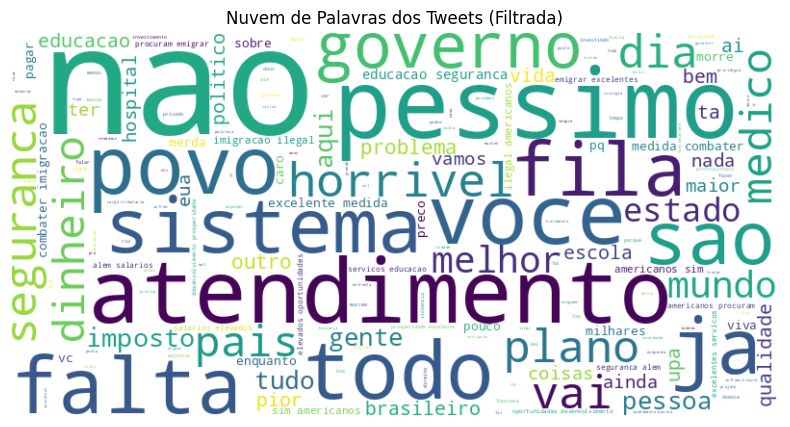

In [ ]:
import matplotlib.pyplot as plt

palavras_para_remover = ['saude', 'publica','publicos','brasil', 'sus','pra', 'medicamentos', 'hospitais', 'publico', 'remedio']

df['texto_filtrado'] = df['texto_limpo'].apply(
    lambda texto: " ".join(palavra for palavra in texto.split() if palavra not in palavras_para_remover)
)

text_filtered = " ".join(tweet for tweet in df['texto_filtrado'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_filtered)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Tweets (Filtrada)')
plt.show()


# Criação do Modelo Analítico

Importação das bibliotecas necessárias

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE

Devido ao número baixo de amostras na base de dados, ocasionado por impeditivos da extração em massa de dados do X (políticas de LGPD), foi decidido que somente serão trabalhados dois tipos de tweets: positivos e negativos.

Isso facilitará o cálculo de métricas, aplicação de testes e identificação de desbalanceamento de classes.

In [ ]:
# Filtro de rótulos negativos ou positivos, somente
df_binary = df[df['sentimento'].isin([-1, 1])].copy()
X = df_binary['texto_filtrado']
y = df_binary['sentimento']

Divisão em treino e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Criação das Pipelines.

Nessa etapa, foram escolhidos os principais modelos aplicados em outros projetos de PLN (Processamento de Linguagem Natural). São eles:



*   **Pipeline 1: TF-IDF + Regressão Logística:**

    Utiliza o TF-IDF (Term Frequency-Inverse Document Frequency) para converter textos em números considerando a frequência das palavras, atribuindo pesos para as maiores frequências.

    Além disso, a Regressão Logística é um modelo linear muito utilizado para classificação binária, além de possuir boa performance com textos.

*   **Pipeline 2: Count Vectorizer + Naive Bayes**

    Count Vectorizer é um algoritmo que converte texto e matriz para facilitar a contagem de palavras, além de ser mais simples que o anterior (TF-IDF).

    Já o Naive Beayes é um algoritmo de classificação que leva em consideração, com alta probabilidade, a independência das variáveis do modelo, funcionando melhor em dados esparsos (palavras muito distintas).

*   **Pipeline 3: TF-IDF + SVM (Support Vector Machine)**

    Além de utilizar o TF-IDF, como o primeiro pipeline, a escolha do algoritmo SVM (Support Vector Machine) se suporta por utilizar a divisão dos dados em diversas dimensões (hiperplanos), maximizando a distância entre as classes.

    Com isso, o SVM consegue trabalhar melhor com textos, pois são espaços de alta dimensão (dados esparsos e em grandes conjuntos).

*   **Pipeline 4: TF-IDF + Random Forest**

    Nesse pipeline, foi utilizado o Random Forest, que é um modelo que trabalha com um conjunto de árvores de decisão. Possui boa capacidade de generalização e lida bem com não-linearidades, trabalhando com probabilidades em cada ramo da "árvore" de decisão.




In [ ]:
# Pipeline 1: TF-IDF + Regressão Logística
pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=1000)),
    ('clf', LogisticRegression(class_weight='balanced'))
])

In [ ]:
# Pipeline 2: Count Vectorizer + Naive Bayes
pipeline2 = Pipeline([
    ('count', CountVectorizer(ngram_range=(1, 2))),
    ('clf', MultinomialNB())
])

In [ ]:
# Pipeline 3: TF-IDF + SVM
pipeline3 = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=1000)),
    ('clf', LinearSVC(class_weight='balanced'))
])

In [ ]:
# Pipeline 4: TF-IDF + Random Forest
pipeline4 = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=1000)),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced'))
])

Treinamento e avaliação dos modelos

In [ ]:
# Lista de Pipelines para aplicação de laço de repetição
pipelines = [
    ("Regressão Logística", pipeline1),
    ("Naive Bayes", pipeline2),
    ("SVM", pipeline3),
    ("Random Forest", pipeline4)
]

Função para treinamento do modelo e saída das métricas de desempenho

In [ ]:
def avaliar_modelo(nome, pipeline, X_train, X_test, y_train, y_test):
    print(f"\nResultados para {nome}:")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))


Avaliação de cada pipeline

In [ ]:
for nome, pipeline in pipelines:
    avaliar_modelo(nome, pipeline, X_train, X_test, y_train, y_test)


Resultados para Regressão Logística:
Acurácia: 0.8421052631578947

Matriz de Confusão:
[[14  0]
 [ 3  2]]

Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.82      1.00      0.90        14
           1       1.00      0.40      0.57         5

    accuracy                           0.84        19
   macro avg       0.91      0.70      0.74        19
weighted avg       0.87      0.84      0.82        19


Resultados para Naive Bayes:
Acurácia: 0.8421052631578947

Matriz de Confusão:
[[13  1]
 [ 2  3]]

Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.87      0.93      0.90        14
           1       0.75      0.60      0.67         5

    accuracy                           0.84        19
   macro avg       0.81      0.76      0.78        19
weighted avg       0.84      0.84      0.84        19


Resultados para SVM:
Acurácia: 0.8947368421052632

Matriz de Confusão:
[[14  0]
 

# Conclusão

**Comparação de Acurácia Geral dos Modelos**


*   Pipeline 1: Regressão Logística: 84.21%
*   Pipeline 2: Naive Bayes: 84.21%
*   Pipeline 3: SVM: 89.47% **(MAIOR)**
*   Pipeline 4: Random Forest: 78.95%


Por classes, os modelos performaram da seguinte forma:

***Classe Negativa (-1)***

| Métrica   | Reg. Logística | Naive Bayes | SVM        | Random Forest |
|-----------|----------------|-------------|------------|---------------|
| Precision | 82%            | 87%         | 88%       | 78%           |
| Recall    | 100%          | 93%         | 100%      | 100%         |
| F1-Score  | 90%            | 90%         | 93%       | 88%           |




**Classe Positiva (+1)**

| Métrica   | Reg. Logística | Naive Bayes | SVM        | Random Forest |
|-----------|----------------|-------------|------------|---------------|
| Precision | 100%          | 75%         | 100%      | 100%         |
| Recall    | 40%            | 60%        | 60%      | 20%           |
| F1-Score  | 57%            | 67%         | 75%       | 33%           |


Retirando uma média simples das métricas de desempenho.

| Reg. Logística | Naive Bayes | SVM        | Random Forest |
|----------------|-------------|------------|---------------|
| 74%          | 78%        | 84%      | 60%       |

Com os dados apresentados acima, é possível concluir que o melhor modelo é o SVM, seguido Naive Bayes, pois ambos apresentaram performance superior tanto nas métricas por classes, quanto na acurácia.

Uma outra conclusão a ser destacada é que todos os modelos tiveram facilidade de classificar a classe de tweets negativos (-1) e dificuldade em tweets positivos (+1).

Isso pode ser explicado pelo desbalanceamento das classes, pois da amostra de 100 tweets coletados, a grande maioria contém palavras e frases de cunho negativo sobre a saúde no Brasil, adequando o modelo à classe com maior frequência de rótulos (negativos).

Esse é um risco de que o modelo pode apresentar *overfitting* e/ou *underfitting*.

# Testes Pipelines

Abaixo, foi feita a definição de frases de teste e seus respectivos rótulos com o objetivo de aplicar as pipelines obtidas acima com frases aleatórias e identificar a efetividade das métricas de desempenho.

Além disso, esses teste podem conter indicativos se os modelos apresentam vieses devido a coleta de dados (*overfitting* e/ou *underfitting*).

In [ ]:
frases_teste = [
    # Frases negativas (-1)
    {
        "texto": "O atendimento no hospital foi péssimo, muito demorado",
        "rotulo": -1
    },
    # Frases positivas (1)
    {
        "texto": "Excelente iniciativa do governo na campanha de vacinação",
        "rotulo": 1
    },
    # Frases negativas (-1)
    {
        "texto": "Falta de medicamentos básicos é um absurdo",
        "rotulo": -1
    },
    # Frases positivas (1)
    {
        "texto": "O novo centro de saúde está muito bem equipado",
        "rotulo": 1
    },
    {
        "texto": "Os médicos são muito atenciosos e competentes",
        "rotulo": 1
    },
    # Frases negativas (-1)
    {
        "texto": "O sistema de saúde está um caos total",
        "rotulo": -1
    },
    # Frases positivas (1)
    {
        "texto": "Adorei o novo programa de prevenção à saúde",
        "rotulo": 1
    },
    # Frases negativas (-1)
    {
        "texto": "Péssimas condições de trabalho para os profissionais",
        "rotulo": -1
    }
]

# Separar textos e rótulos
textos = [f["texto"] for f in frases_teste]
rotulos_reais = [f["rotulo"] for f in frases_teste]

## Testes Pipeline 1

In [ ]:
melhor_modelo = pipeline1
predicoes = melhor_modelo.predict(textos)

print("\nTeste com novas frases:")
for frase, predicao in zip(textos, predicoes):
    sentimento = "Positivo" if predicao == 1 else "Negativo"
    print(f"\nFrase: {frase}")
    print(f"Sentimento previsto: {sentimento}")

# Calculando a taxa de acerto
acertos = sum(1 for pred, real in zip(predicoes, rotulos_reais) if pred == real)
taxa_acerto = acertos / len(rotulos_reais)

print("\n" + "="*50)
print(f"\nTaxa de acerto do modelo: {taxa_acerto:.2%}")
print(f"Total de acertos: {acertos} de {len(rotulos_reais)} frases")


Teste com novas frases:

Frase: O atendimento no hospital foi péssimo, muito demorado
Sentimento previsto: Negativo

Frase: Excelente iniciativa do governo na campanha de vacinação
Sentimento previsto: Negativo

Frase: Falta de medicamentos básicos é um absurdo
Sentimento previsto: Negativo

Frase: O novo centro de saúde está muito bem equipado
Sentimento previsto: Negativo

Frase: Os médicos são muito atenciosos e competentes
Sentimento previsto: Negativo

Frase: O sistema de saúde está um caos total
Sentimento previsto: Negativo

Frase: Adorei o novo programa de prevenção à saúde
Sentimento previsto: Negativo

Frase: Péssimas condições de trabalho para os profissionais
Sentimento previsto: Negativo


Taxa de acerto do modelo: 50.00%
Total de acertos: 4 de 8 frases


## Testes Pipeline 2

In [ ]:
melhor_modelo = pipeline2
predicoes = melhor_modelo.predict(textos)

print("\nTeste com novas frases:")
for frase, predicao in zip(textos, predicoes):
    sentimento = "Positivo" if predicao == 1 else "Negativo"
    print(f"\nFrase: {frase}")
    print(f"Sentimento previsto: {sentimento}")

# Calculando a taxa de acerto
acertos = sum(1 for pred, real in zip(predicoes, rotulos_reais) if pred == real)
taxa_acerto = acertos / len(rotulos_reais)

print("\n" + "="*50)
print(f"\nTaxa de acerto do modelo: {taxa_acerto:.2%}")
print(f"Total de acertos: {acertos} de {len(rotulos_reais)} frases")


Teste com novas frases:

Frase: O atendimento no hospital foi péssimo, muito demorado
Sentimento previsto: Negativo

Frase: Excelente iniciativa do governo na campanha de vacinação
Sentimento previsto: Positivo

Frase: Falta de medicamentos básicos é um absurdo
Sentimento previsto: Negativo

Frase: O novo centro de saúde está muito bem equipado
Sentimento previsto: Positivo

Frase: Os médicos são muito atenciosos e competentes
Sentimento previsto: Negativo

Frase: O sistema de saúde está um caos total
Sentimento previsto: Negativo

Frase: Adorei o novo programa de prevenção à saúde
Sentimento previsto: Negativo

Frase: Péssimas condições de trabalho para os profissionais
Sentimento previsto: Negativo


Taxa de acerto do modelo: 75.00%
Total de acertos: 6 de 8 frases


## Testes Pipeline 3

In [ ]:
melhor_modelo = pipeline3
predicoes = melhor_modelo.predict(textos)

print("\nTeste com novas frases:")
for frase, predicao in zip(textos, predicoes):
    sentimento = "Positivo" if predicao == 1 else "Negativo"
    print(f"\nFrase: {frase}")
    print(f"Sentimento previsto: {sentimento}")

# Calculando a taxa de acerto
acertos = sum(1 for pred, real in zip(predicoes, rotulos_reais) if pred == real)
taxa_acerto = acertos / len(rotulos_reais)

print("\n" + "="*50)
print(f"\nTaxa de acerto do modelo: {taxa_acerto:.2%}")
print(f"Total de acertos: {acertos} de {len(rotulos_reais)} frases")


Teste com novas frases:

Frase: O atendimento no hospital foi péssimo, muito demorado
Sentimento previsto: Negativo

Frase: Excelente iniciativa do governo na campanha de vacinação
Sentimento previsto: Negativo

Frase: Falta de medicamentos básicos é um absurdo
Sentimento previsto: Negativo

Frase: O novo centro de saúde está muito bem equipado
Sentimento previsto: Positivo

Frase: Os médicos são muito atenciosos e competentes
Sentimento previsto: Negativo

Frase: O sistema de saúde está um caos total
Sentimento previsto: Negativo

Frase: Adorei o novo programa de prevenção à saúde
Sentimento previsto: Negativo

Frase: Péssimas condições de trabalho para os profissionais
Sentimento previsto: Negativo


Taxa de acerto do modelo: 62.50%
Total de acertos: 5 de 8 frases


## Testes Pipeline 4

In [ ]:
melhor_modelo = pipeline4
predicoes = melhor_modelo.predict(textos)

print("\nTeste com novas frases:")
for frase, predicao in zip(textos, predicoes):
    sentimento = "Positivo" if predicao == 1 else "Negativo"
    print(f"\nFrase: {frase}")
    print(f"Sentimento previsto: {sentimento}")

# Calculando a taxa de acerto
acertos = sum(1 for pred, real in zip(predicoes, rotulos_reais) if pred == real)
taxa_acerto = acertos / len(rotulos_reais)

print("\n" + "="*50)
print(f"\nTaxa de acerto do modelo: {taxa_acerto:.2%}")
print(f"Total de acertos: {acertos} de {len(rotulos_reais)} frases")


Teste com novas frases:

Frase: O atendimento no hospital foi péssimo, muito demorado
Sentimento previsto: Negativo

Frase: Excelente iniciativa do governo na campanha de vacinação
Sentimento previsto: Negativo

Frase: Falta de medicamentos básicos é um absurdo
Sentimento previsto: Negativo

Frase: O novo centro de saúde está muito bem equipado
Sentimento previsto: Negativo

Frase: Os médicos são muito atenciosos e competentes
Sentimento previsto: Negativo

Frase: O sistema de saúde está um caos total
Sentimento previsto: Negativo

Frase: Adorei o novo programa de prevenção à saúde
Sentimento previsto: Negativo

Frase: Péssimas condições de trabalho para os profissionais
Sentimento previsto: Negativo


Taxa de acerto do modelo: 50.00%
Total de acertos: 4 de 8 frases


Como identificado na conclusão, é possível verificar que os modelos com maior taxa de acertos foram os Pipelines 2 e 3, ou seja, os dois com melhores métricas de desempenho.